In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, euclidean_distances

Проведём предварительную обработку данных

In [3]:
# Загрузим датасет 5gym_churn.csv с помощью библиотеки pandas в Jupyter-ноутбуке
data = pd.read_csv(r'C:\Users\Dima\Desktop\aaa_GUAP_\Боженко\5gym_churn.csv')

In [4]:
# выведем первые 20 строк при помощи команды head:
data.head(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Информация о клиентах фитнес клуба:
1. Пол
2. Близкое расположение
3. Сотрудник компании партнера
4. По промо друзей
5. Указан ли телефон
6. Длительность текущего абонемента
7. Посещение групповых занятий
8. Возраст
9. Средние траты на доп услуги
10.Количество месяцев до окончания абонемента
11. время с момента первого обращения в фитнесцентр (в месяцах) 
12.средняя частота посещений в неделю за все 
время с начала действия абонемента
13.средняя частота посещений в неделю за 
предыдущий месяц
14.Churn – факт ухода из клуба

In [6]:
data.astype({'Month_to_end_contract': 'int64'}) # Приведём столбец "Month_to_end_contract" к типу данных "int64":

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


## Выполним кластеризацию объектов

Кластеризируем объекты иерархическим агломеративным методом.
Методом, по которому вычисляется расстояние между кластерами выберем "ward". Метрикой, по которой вычисляется расстояние между объектами выберем евклидову:

In [7]:
link = linkage(StandardScaler().fit_transform(data), method = 'ward', metric='euclidean')

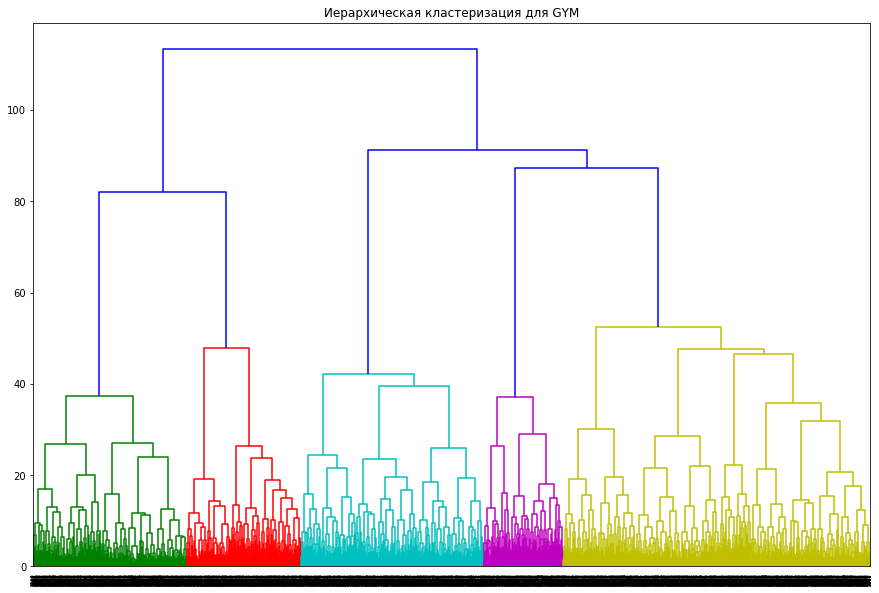

In [8]:
# Построим дендрограмму иерархической кластеризации
plt.figure(figsize=(15, 10))
dendrogram(link, orientation='top')
plt.title('Иерархическая кластеризация для GYM')
plt.show()

Из дендрограммы предположим, что оптимальное число кластеров равно 5. Определим признаки (характеристики), оказавших наибольшее влияние на выделение кластеров

In [9]:
data['cluster'] = fcluster(link, 5, criterion='maxclust')
data.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
1,0.510929,0.997268,0.337432,0.229508,1.000000,1.767760,0.295082,26.927596,115.042074,1.710383,0.986339,1.480896,1.057191,0.998634
2,0.502732,0.000000,0.500911,0.085610,1.000000,3.020036,0.229508,28.755920,135.796838,2.846995,2.805100,1.778723,1.610243,0.406193
3,0.472414,0.997701,0.703448,0.489655,1.000000,11.173563,0.548276,29.758621,165.752454,10.251724,4.370115,2.024836,2.025675,0.004598
4,0.520942,0.861257,0.471204,0.306283,0.000000,4.701571,0.421466,29.277487,144.221728,4.397906,3.782723,1.859095,1.727455,0.269634
5,0.532379,0.991138,0.431493,0.324472,0.997273,2.901159,0.456033,30.105658,156.587807,2.642808,5.037491,2.033922,2.036875,0.000000


После усреднения значений можно увидеть, что на выделение кластеров оказали влияние такие признаки, как: Near_Location, Phone, Contract_period, Month_to_end_contract и Churn.

Опишем полученые кластеры:

К первому кластеру относятся люди либо покинувшие фитнес клуб, либо те, кто скоро может его покинуть. Соответственно там минимум сотрудников компаний партнёра. Это люди купившие абонемент на короткий срок, они редко посещают фитнес клуб и не любящие тратиться на дополнительные услуги. Примечательно также то, что, в среднем, в данном кластере самые молодые люди. Это "Ненадёжные клиенты".
Ко второму кластеру относятся люди, живущие далеко от фитнес клуба. Среди них минимальное количество людей, пришедших по промо друзей. Это "Далеко живущие люди".
К третьему кластеру относятся люди, с самой большой длительностью текущего абонемента. Они сильно тратятся на дополнительные услуги и зачастую посещают групповые занятия. Среди них небольшой процент покинувших фитнес клуб и они довольно часто посещают занятия. Зачастую это сотрудники компании партнёра. Это "Прибыльные клиенты".
Люди, относящиеся к четвёртому кластеру примечательны только тем, что ни один из них не указал номер своего телефона. Это "Скрытные люди".
В последнем кластере люди дольше всего посещающие питнес клуб. Ни один из них не покинул его. Они чаще всех посещают занятия. В среднем это самые великовозрастные люди. Это "Надёжные клиенты".

### Кластеризируем объекты методом k-средних.

Число кластеров зададим равным 5

In [11]:
standart_data = StandardScaler().fit_transform(data)
model = KMeans(n_clusters=5, random_state=0) #Инициализация модели
model.fit(standart_data) # Подгонка модели по стандартизированным данным

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
KMeans(n_clusters=5, random_state=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
euclidean_distances(standart_data)

array([[0.        , 6.23013076, 5.89311576, ..., 5.97919373, 5.1148807 ,
        4.72925207],
       [6.23013076, 0.        , 5.02725244, ..., 4.60312425, 4.36382722,
        5.66335497],
       [5.89311576, 5.02725244, 0.        , ..., 4.92175006, 3.26647096,
        6.49395956],
       ...,
       [5.97919373, 4.60312425, 4.92175006, ..., 0.        , 3.49129681,
        5.98896315],
       [5.1148807 , 4.36382722, 3.26647096, ..., 3.49129681, 0.        ,
        6.29323763],
       [4.72925207, 5.66335497, 6.49395956, ..., 5.98896315, 6.29323763,
        0.        ]])

Определим объекты, относящиеся к каждому кластеру:

In [14]:
model.labels_

array([3, 1, 3, ..., 1, 3, 1])

Выведем таблицу средних значений в каждом кластере и определим признаки, оказавшие наибольшее влияние на выделение кластеров:

In [16]:
data['cluster'] = model.labels_
data.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.559763,0.983432,0.392899,0.298225,0.900592,2.900592,0.478107,30.067456,161.035105,2.671006,4.803550,2.910258,2.919108,0.004734
1,0.502575,0.943357,0.740474,0.511843,0.901133,11.697219,0.556128,29.849640,163.518713,10.709578,4.673532,2.007930,2.002536,0.014418
2,0.500914,0.000000,0.466179,0.078611,0.917733,2.171846,0.208410,28.553931,133.552346,2.053016,2.628885,1.702013,1.512410,0.447898
3,0.472619,0.996429,0.447619,0.317857,0.896429,2.885714,0.423810,30.050000,152.644855,2.676190,4.866667,1.187701,1.182941,0.002381
4,0.513174,1.000000,0.332497,0.219573,0.907152,1.636136,0.294856,26.957340,114.992178,1.585947,0.973651,1.478722,1.049109,0.998745


После усреднения значений можно увидеть, что на выделение кластеров оказали влияние такие признаки, как: Near_Location, Contract_period, Phone, Month_to_end_contract и Churn.

Опишем полученые кластеры:

К первой группе относятся "Идеальные клиенты". Это люди пришедшие по промо друзей или являющиеся сотрудниками компании партнёра и они имеют самый длительный абонимент, больше всего тратятся на дополнительные услуги и зачастую посещают групповые занятия. Среди них мало людей покинувших клуб.
Второй кластер состоит из людей живущих далеко от фитнес клуба. Среди них мало тех, кто пришёл по промо друзей и они реже всех посещают групповые занятия. Среди них приличный процент покинули фитнес клуб. Это "Далеко живущие люди".
В третьем кластере находятся "Надёжные клиенты" - те, среди которых минимальный процент покинувших фитнес клуб. Они дольше всех посещают его и чаще всех ходят на занятия. В среднем это самые великовозрастные люди.
Четвёртый кластер состоит из "Ненадёжных клиентов". Большинство из них уже покинули клуб. В среднем они занимаются по абонементам с наименьшей длительностью, реже всех ходят в спортзал и мало тратятся. Как правило это самые молодые люди.
В пятом кластере "Скрытные люди" н указавшие свой телефон.
Определим оптимальное число кластеров методом "локтя":

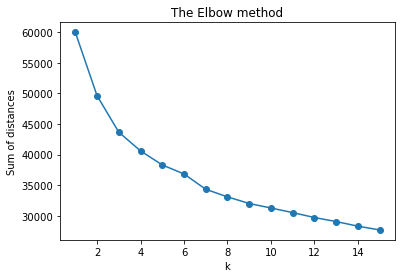

In [17]:
models = [KMeans(n_clusters = k, random_state=0).fit(standart_data) for k in range(1, 16)]
dist = [model.inertia_ for model in models]

plt.plot(range(1, 16), dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow method')
plt.show()

Из графика видно, что график становится круче при значении k=5, что означает, что оптимальное число кластеров равно пяти.

Вывод: в ходе выполнения лабораторной работы были изучены алгоритмы и методы кластерного анализа. Над набором данных 5gym_churn была проведена кластеризация иерархическим агломеративным методом и методом k-средних. Было выявлено 5 кластеров - "Прибыльные клиенты", "Далеко живущие люди", "Надёжные клиенты", "Ненадёжные клиенты" и "Скрытные люди".